In [55]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [8]:
X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

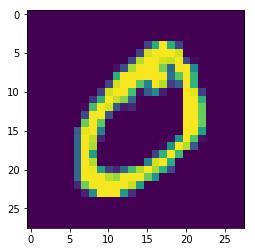

In [9]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [81]:
in_layer = Input(shape=[28, 28, 1])
layer_1 = Conv2D(32, (3,3), activation="relu")(in_layer)
layer_2 = MaxPool2D()(layer_1)
layer_3 = Conv2D(64, (3,3), activation="relu")(layer_2)
layer_4 = MaxPool2D()(layer_3)
drop = Dropout(.25)(layer_4)
layer_5 = Conv2D(128, (3,3), activation="relu")(drop)
layer_6 = MaxPool2D()(layer_5)

flatten = Flatten()(layer_6)

d1 = Dense(400, activation="tanh")(flatten)
d2 = Dense(100, activation="tanh")(d1)
d3 = Dense(50, activation="tanh")(d2)
out = Dense(10, activation="softmax")(d3)


In [82]:
model = Model(inputs=[in_layer], outputs=[out])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [84]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [85]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 4s 699us/step - loss: 1.6893 - acc: 0.4560
Epoch 2/10
5360/5360 [==============================] - 3s 585us/step - loss: 0.7008 - acc: 0.8175
Epoch 3/10
5360/5360 [==============================] - 3s 575us/step - loss: 0.3500 - acc: 0.9050
Epoch 4/10
5360/5360 [==============================] - 3s 541us/step - loss: 0.2701 - acc: 0.9248
Epoch 5/10
5360/5360 [==============================] - 3s 611us/step - loss: 0.2183 - acc: 0.9366
Epoch 6/10
5360/5360 [==============================] - 3s 541us/step - loss: 0.1792 - acc: 0.9504
Epoch 7/10
5360/5360 [==============================] - ETA: 0s - loss: 0.1534 - acc: 0.958 - 3s 540us/step - loss: 0.1528 - acc: 0.9582
Epoch 8/10
5360/5360 [==============================] - 3s 545us/step - loss: 0.1306 - acc: 0.9625
Epoch 9/10
5360/5360 [==============================] - 3s 591us/step - loss: 0.1243 - acc: 0.9675
Epoch 10/10
5360/5360 [==============================] - 3s 544us/step 

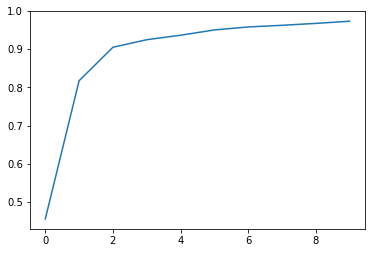

In [86]:
plt.plot(hist.history["acc"])

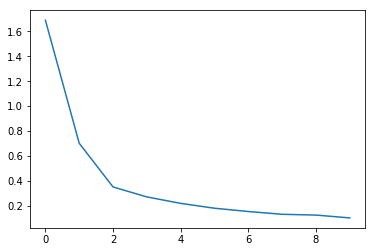

In [87]:
plt.plot(hist.history["loss"])

In [88]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 212us/step


[0.12234728258441795, 0.9666666666666667]

[[6 9 5 4 0 8 3 7 2 1]]


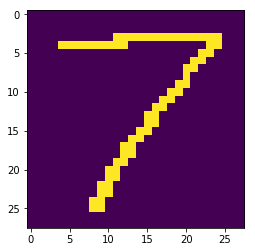

In [92]:
import cv2
one = cv2.imread("../datasets/nums/seven.jpeg")
gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
small = (small < 100).astype(int) * 255
print(np.argsort(model.predict(np.array([small.reshape(28,28, 1)]))))
plt.imshow(small)

In [56]:
Dropout?

In [93]:
push "l 15"

SyntaxError: invalid syntax (<ipython-input-93-1bf620c8cfd5>, line 1)